# Установка нужных библиотек

In [44]:
import warnings
warnings.filterwarnings("ignore")

try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False
    
if IN_COLAB:
    !git clone -qq https://github.com/Intelligent-Systems-Phystech/ProjectTemplate.git /tmp/repo
    !python3 -m pip install -qq /tmp/repo/src/ && rm -rf /tmp/repo

# Импорт библиотек

In [45]:
import numpy as np
from matplotlib import pylab as plt
from importlib import reload

from gradient_approximation import *
from optimizers import *
from sets import *
from utils import *
from run_experiments import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Настройка окружения

In [46]:
if IN_COLAB:
    figures = '.'
else:
    figures = '../figures'

## 1. Квадратичная задача

### Описание задачи

In [71]:
func_name = "quadratic"
d = 100
L = 1000
mu = 1
sigma = 1e-6


SEED = 18
args = init_experiment(func_name, d, seed=SEED, L=L, mu=mu)

sett = R()
np.random.seed(SEED)
x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

### Поиск точного решения

In [72]:
def learning_rate(k):
    return 1./(k+1000)

In [73]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="det", args=args)
TrueGradient = TrueGradientApproximator(func_name, args=args)

GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**4)
GD.optimize()

100%|█████████████████████████████████████████████| 10000/10000 [00:00<00:00, 34433.84it/s]


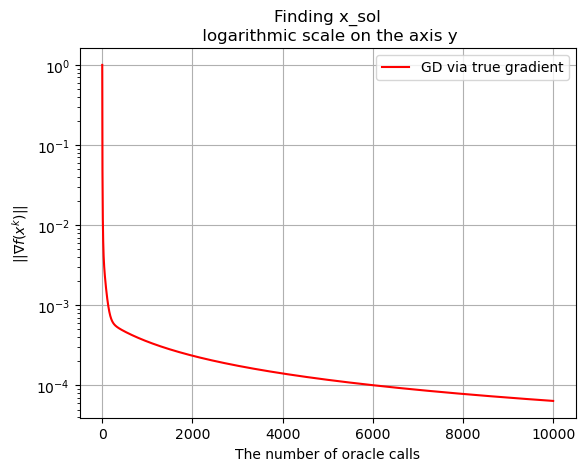

In [74]:
make_err_plot([GD], labels=["GD via true gradient"], title='Finding x_sol')
x_sol = GD.x_curr

In [75]:
def learning_rate_GD(k):
    return 1./L

def learning_rate_AcceleratedGD(k):
    return 0.75/L

def learning_rate_Nesterov(k):
    return 1./L

100%|███████████████████████████████████████████████████| 100/100 [00:00<00:00, 161.20it/s]


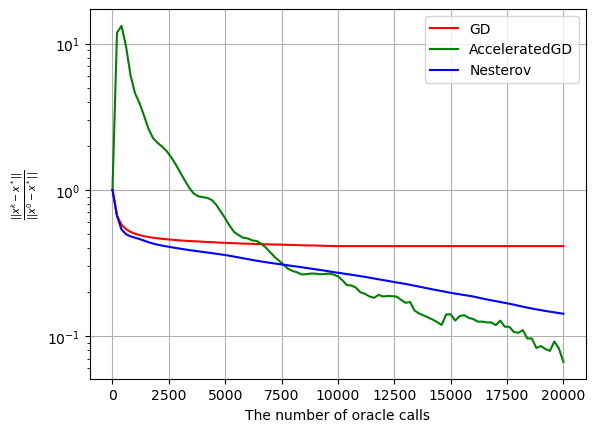

In [78]:
Turtle = TurtleApproximator(oracle, gamma=1e-5)

seed = 15
np.random.seed(seed)
x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

p = 0.9
beta = p * (mu * learning_rate_AcceleratedGD(0))**0.5
eta = 1/(mu * learning_rate_AcceleratedGD(0))**0.5
theta = (p / eta - 1)/(beta * p / eta - 1)

momentum = 0.9
num_calls = 10**4

optimizers_list = [
    GDOptimizer(Turtle, learning_rate_GD, x_0, sett, x_sol=x_sol, max_oracle_calls=num_calls),
    AcceleratedGDOptimizer(Turtle, learning_rate_AcceleratedGD, x_0, theta, eta, beta, p, sett, x_sol=x_sol, max_oracle_calls=num_calls),
    NesterovOptimizer(Turtle, learning_rate_Nesterov, x_0, momentum, sett, x_sol=x_sol, max_oracle_calls=num_calls),
]

for opt in optimizers_list:
    opt.optimize()

#make_err_plot(optimizers_list)
make_err_plot(optimizers_list, save_name=f"Deterministic_quadratic_GD_AGD_Nesterov_{seed}")

## 2. Логистическая регрессия

In [65]:
func_name = "mushrooms"
d = 112
SEED = 18
sigma = 1e-7
sett = L2Ball(radius=0.5)
mu = 0.1
L = 20

args = init_experiment(func_name, d, sigma=sigma, alpha=mu)

np.random.seed(SEED)
x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0) * 0.5

In [66]:
def learning_rate(k):
    return 1./ (10 * L)

In [68]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="det", args=args)
#TrueGradient = TrueGradientApproximator(func_name, args=args) 
#GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**4)
#GD.optimize()
# make_err_plot([GD], labels=["GD via true gradient"], title='Finding x_sol')
# x_sol = GD.x_curr
# print(np.linalg.norm(x_sol))

In [69]:
def learning_rate_GD(k):
    return 1./L

def learning_rate_AcceleratedGD(k):
    return 0.75/L

def learning_rate_Nesterov(k):
    return 1./L

100%|██████████████████████████████████████████████████████| 89/89 [00:15<00:00,  5.57it/s]


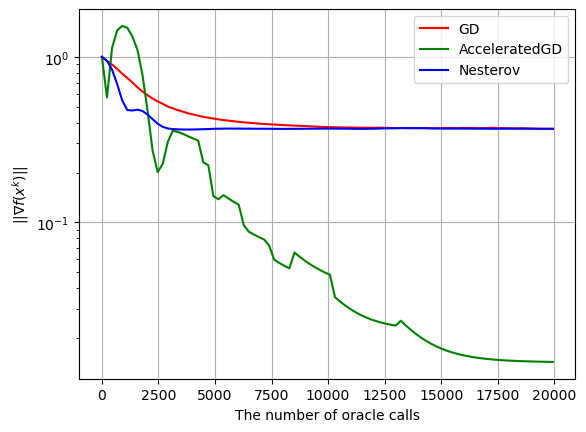

In [70]:
gamma=1e-5
Turtle = TurtleApproximator(oracle, gamma=gamma)

seed = 15
np.random.seed(seed)
x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0) * 0.5

p = 0.9
beta = p * (mu * learning_rate_AcceleratedGD(0))**0.5
eta = 1/(mu * learning_rate_AcceleratedGD(0))**0.5
theta = (p / eta - 1)/(beta * p / eta - 1)

momentum = 0.9

num_calls = 10**4

optimizers_list = [
    GDOptimizer(Turtle, learning_rate_GD, x_0, sett, max_oracle_calls=num_calls),
    AcceleratedGDOptimizer(Turtle, learning_rate_AcceleratedGD, x_0, theta, eta, beta, p, sett, max_oracle_calls=num_calls),
    NesterovOptimizer(Turtle, learning_rate_Nesterov, x_0, momentum, sett, max_oracle_calls=num_calls),
]

for opt in optimizers_list:
    opt.optimize()

make_err_plot(optimizers_list, title=None, save_name=f'Non_stochastic_Logreg_GD_AGD_Nesterov_{seed}_{sigma}_{gamma}')